In [2]:
import torch
import matplotlib.pyplot as plt
from dataload import *
from gan_architecture import *
from utils import *

In [3]:
#device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device = torch.device('cpu')
device

device(type='cpu')

## Parameters

Loaded image shape in tensor: torch.Size([16, 3, 128, 128])


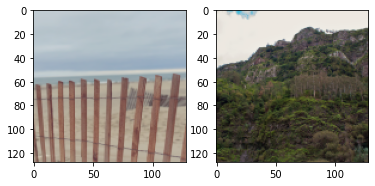

In [4]:
batch_size = 16

train_loader, _ = define_loaders(batch_size, batch_size, 
                             rescale=129,
                             crop=128,
                             test_set=False,
                             dataset="data/lhq_256")

z_dim = 128

# get minibatch
x = next(iter(train_loader))
x_test = next(iter(train_loader))


print('Loaded image shape in tensor:', x.size())
fig,axes = plt.subplots(1,2);
img1 = (minmax_scale(x, 0, 1))[0].numpy().transpose((1, 2, 0))
img2 = minmax_scale(x_test, 0, 1)[0].detach().numpy().transpose((1, 2, 0))
axes[0].imshow(img1); # .transpose((1, 2, 0))
axes[1].imshow(img2);

In [5]:
x.min(), x.max()

(tensor(0.), tensor(1.))

## Test trained model

In [6]:
model = Generator(z_dim).to(device)
model2 = Discriminator().to(device)
x = torch.randn(batch_size, z_dim)
x = x.to(device)
generated = (model(x))
model2(generated)
print(f"Number of parameters : D : {get_n_params(model2)}, G : {get_n_params(model)}")

Number of parameters : D : 16901081, G : 26730567


In [7]:
import pandas as pd
fichier = "res-gan-2"


model = Generator(z_dim)#.to(device)
#model2 = Discriminator().to(device)
#model.load_state_dict(torch.load(f"saved_models/{fichier}_generator.sav"))
model.load_state_dict(torch.load(f"saved_models/{fichier}_generator_epoch400.sav"))

<All keys matched successfully>

In [7]:
#testacc = pd.read_csv(f"saved_models/{fichier}_testaccs.csv")
#plt.plot(testacc.index, testacc["discriminator"], label = "discriminator")

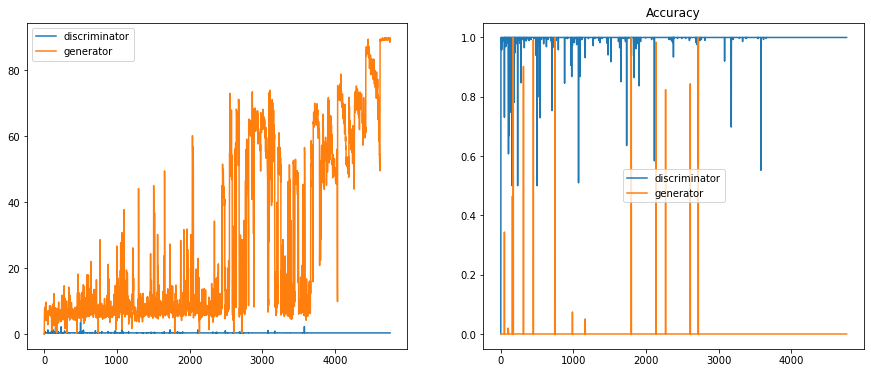

In [8]:
losses = pd.read_csv(f"saved_models/{fichier}_losses.csv")[::2]
acc = pd.read_csv(f"saved_models/{fichier}_accs.csv")[::2]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))
ax1.plot(losses.index, losses["discriminator"], label = "discriminator")
ax1.plot(losses.index, losses["generator"], label = "generator")
plt.title("Loss")
ax1.legend()
plt.grid()
ax2.plot(acc.index, acc["discriminator"], label = "discriminator")
ax2.plot(acc.index, acc["generator"], label = "generator")
plt.title("Accuracy")
ax2.legend()
plt.grid()

Shape : torch.Size([16, 3, 128, 128])


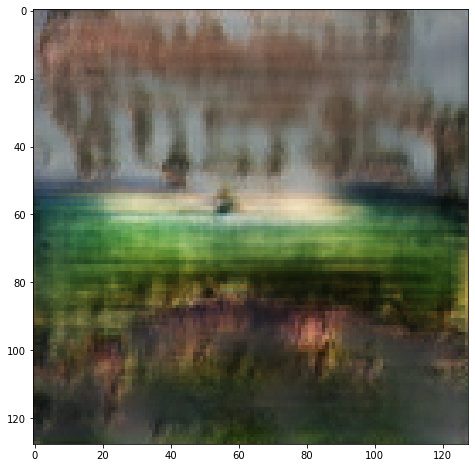

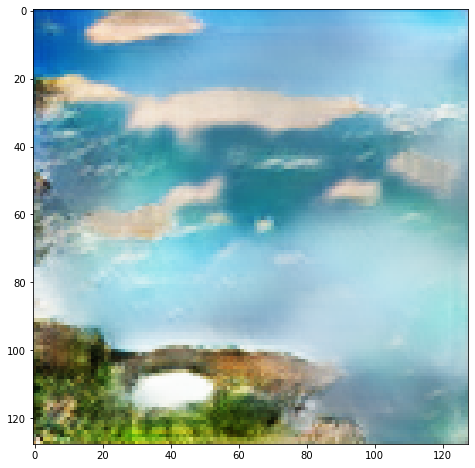

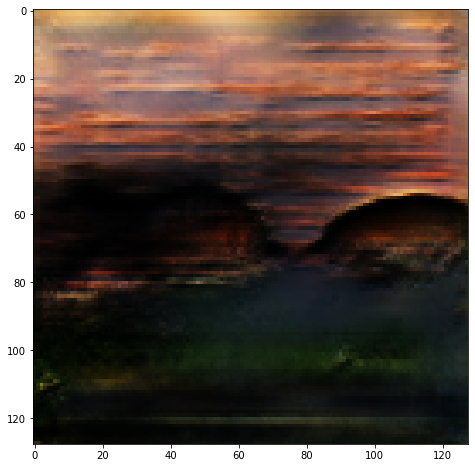

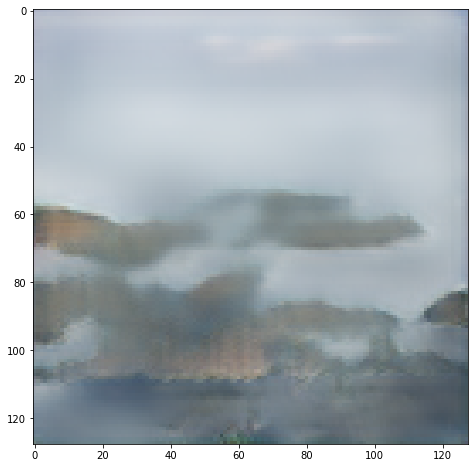

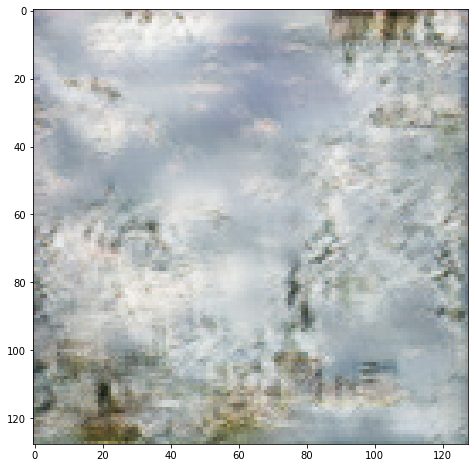

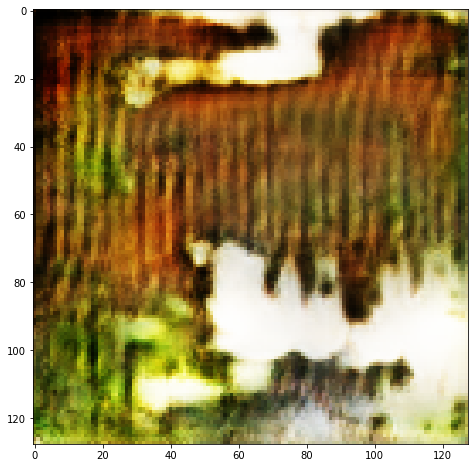

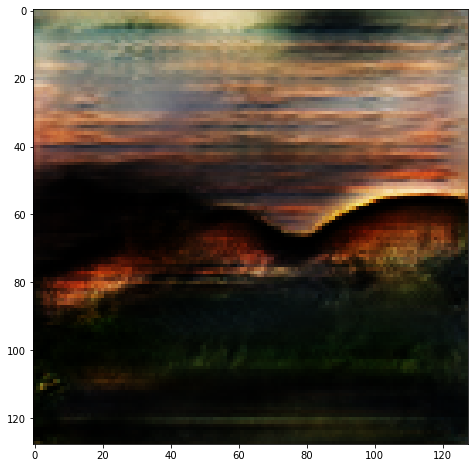

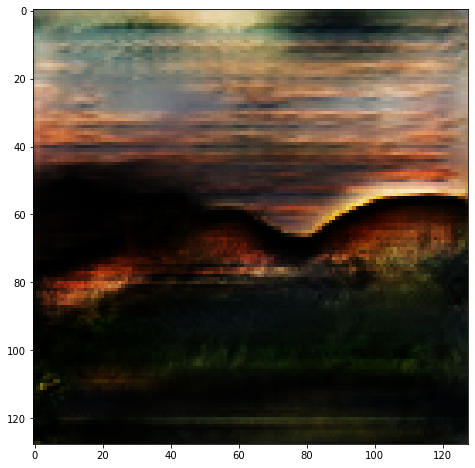

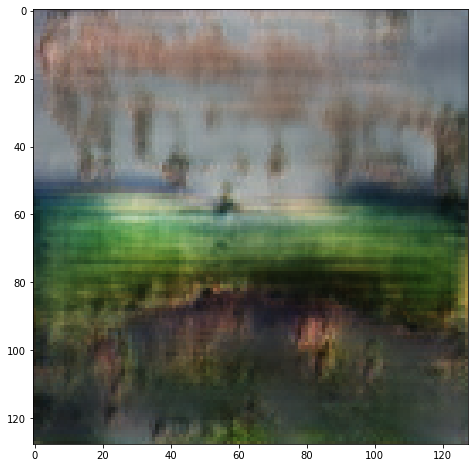

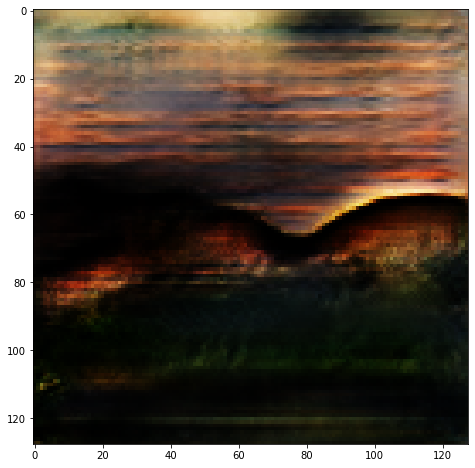

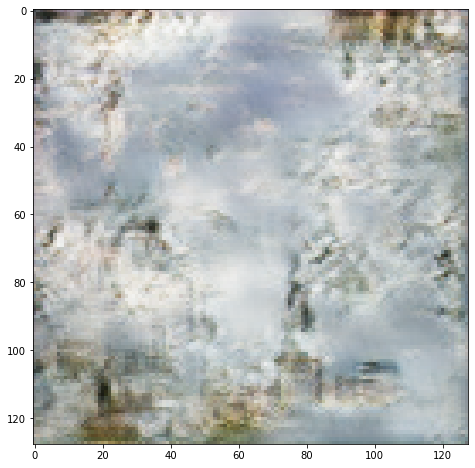

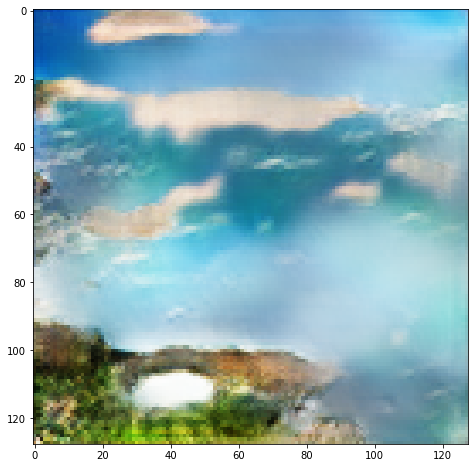

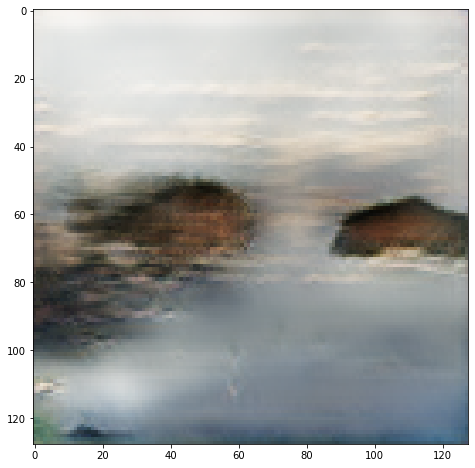

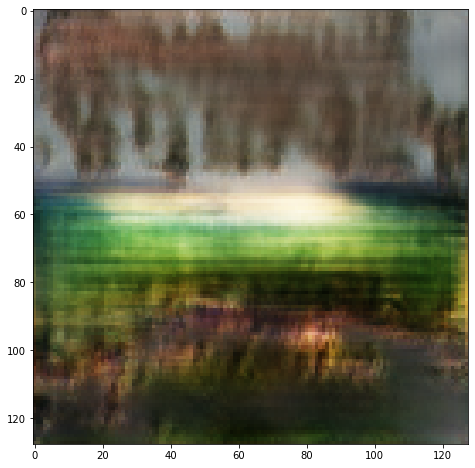

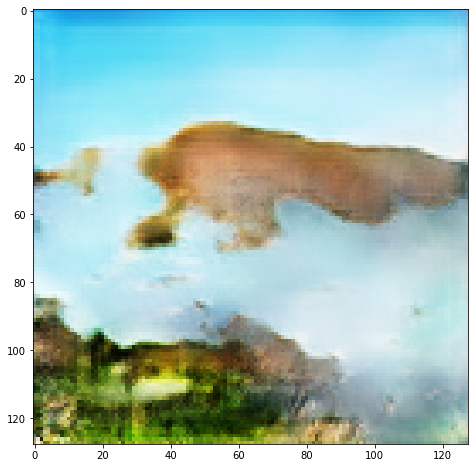

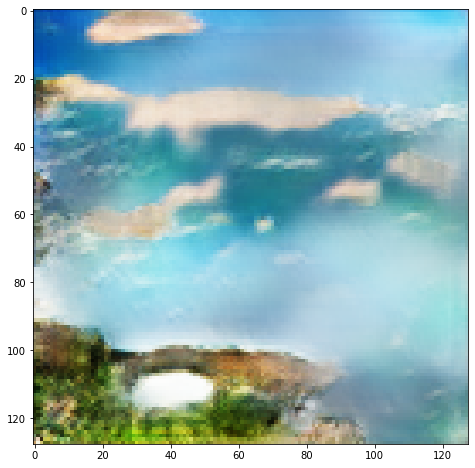

In [9]:
x = torch.randn(batch_size, z_dim)
i = np.random.randint(15)
x = x.to(device)
generated = model(x)
print(f"Shape : {generated.shape}")
#axes[0].imshow(generated[i].cpu().detach().numpy().transpose((1, 2, 0)))
for i in range(batch_size):
    fig,axes = plt.subplots(1,1, figsize=(6,6))
    axes.imshow(generated[i].cpu().detach().numpy().transpose((1, 2, 0)))